### scipy ###      

**what is scipy?**
it is a scientific computation library built on top of numpy

scipy stands for scientific python

it has more optimization and signal processing features.  





 **SciPy for ML, Chemistry & Drug Design**
**Essential Sub-Packages & Applications**  

1.**scipy.linalg** - linear algebra  

Used in PCA, matrix decompositions, solving linear systems (common in ML & quantum chemistry).

**key functions**  

- eig(),svd()&nbsp;&nbsp;&nbsp; (singular value Decomposition)  
- solve(),inv()&nbsp;&nbsp;&nbsp;(matrix inversion)  
- cholesky() &nbsp;&nbsp;&nbsp;  (for positive definite matrices)


1. **solving simple equations**

&nbsp;      2x&nbsp;+&nbsp;3y&nbsp;=&nbsp;8
  
 &nbsp;    4x&nbsp;-&nbsp;y&nbsp;=&nbsp;6

In [1]:
from scipy.linalg import solve
import numpy as np
A=np.array([[2,3],[4,-1]]) #the coeeficients of the equations
B=np.array([8,6])         #the results of the equations
X=solve(A,B)
print(X)


[1.85714286 1.42857143]


In [2]:
# let another equation be 
# 3x + 2y = 16 and 5x - 4y = 2 
def solve_equation(A, B):
    return solve(A, B)

K=np.array([[3,2],[5,-4]]) #the coeeficients of the equations
L=np.array([16,2])         #the results of the equations
Y=solve_equation(K, L)
print(Y)

[3.09090909 3.36363636]


**matrix multiplication**  

we use matmul but it is availiable in numpy

In [3]:
from numpy import matmul
h=matmul(A,B)
print(h)

[34 26]


**Determinant of matrix**  

we use det

In [4]:
from scipy.linalg import  det
print(det(A)) 

-14.0


**Simple Inverse Matrix**  

we use inv 

In [5]:
from scipy.linalg import inv
print(inv(A))

[[ 0.07142857  0.21428571]
 [ 0.28571429 -0.14285714]]


**Basic Eigenvalues**  

we use eig to find eigen values and eigen vector 

In [6]:
from scipy.linalg import eig

A = np.array([[1, 2], [2, 1]])
print(eig(A))

(array([ 3.+0.j, -1.+0.j]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


here the output means:  

array([ 3.+0.j, -1.+0.j])  

These are the eigenvalues of A:

- 3

- -1

(The +0.j means they are complex numbers, but here the imaginary part is zero.)

array([[ 0.70710678, -0.70710678], [ 0.70710678,  0.70710678]]) are the eigenvectors of A,   

arranged as columns:  

The first column [0.707..., 0.707...] is the eigenvector for eigenvalue 3.  

The second column [-0.707..., 0.707...] is the eigenvector for eigenvalue -1.

The first array = eigenvalues  

The second array = eigenvectors (each column corresponds to an eigenvalue)  




**Least Squares (lstsq)**

Purpose: Fit noisy data to a linear model.

Watch this video if you don't know how to do least square fitting using matrix 

[Watch this video on YouTube](https://youtu.be/RlQBEhLhM8Y?si=O8fE6tJg6XyCIkGd)



![Image](https://www.sharetechnote.com/image/EngMath_LeastSquare_Matrix_01.png)


so we need the matrix in this form 

**We can find the rate constant of a reaction using lstsq(least square fitting)**

We want to express our first-order kinetic equation:

ln[A] = -k*t + ln[A₀]

in matrix form as:

A * x = y

where:

A = design matrix (contains time values and 1's)

x = unknown parameters [-k, ln[A₀]]

y = observed values ln([A]) (shown as b in diagram)

**prerequisites before directly finding rate constant**

In [7]:
q=np.array([1, 2, 1])
s=np.array([3, 5, 6])
t=np.vstack((q, s))  # vertical stack
print(t)
print(t.T) #prints the transpose of the matrix

[[1 2 1]
 [3 5 6]]
[[1 3]
 [2 5]
 [1 6]]


In [16]:
from scipy.linalg import lstsq
# Example: Fit reaction rate data (1st-order kinetics)
time = np.array([0, 1, 2, 3])  # Time points
concentration = np.array([1.0, 0.6, 0.3, 0.2])  # Experimental data
A = np.vstack([time, np.ones(len(time))]).T  # Design matrix note: T is transpose
k, ln_C0 = lstsq(A, np.log(concentration))[0]
print(f"Rate constant (k): {k}, Intercept: {ln_C0}")
print(A,"is the design matrix") 
print(lstsq(A, concentration)) # returns the rate constant and intercept



Rate constant (k): -0.5521460917862244, Intercept: -0.002839947452170039
[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]] is the design matrix
(array([-0.27,  0.93]), 0.022999999999999948, 2, array([4.10003045, 1.09075677]))


In [ ]:
print(lstsq(A, np.log(concentration)))

(array([-0.55214609, -0.00283995]), 0.013820380140128935, 2, array([4.10003045, 1.09075677]))


we can see above that lstsq returns a tuple with 4 values.

1. Solution vector (x) [0]  

   Contains the fitted parameters (what we want here)  

   For our case: [-k, ln_C0]  


2. Sum of squared residuals [1]  

   Measures how good the fit is


3. Rank of matrix A [2]


4. Singular values of A [3]

**Optimization with SciPy:**

Optimization is crucial in chemistry and ML for tasks like:  

Fitting kinetic models to experimental data  

Minimizing energy in molecular simulations  

Training machine learning models  

**what is optimization**

Finding inputs (parameters) that give the best output (minimum/maximum) of a function.

let f(x) is a function we are finding the best x that makes the function minimum or maximum

**Types in SciPy:**  

Minimization (most common),Curve Fitting,Root Finding.


**Minimization**

example : a simple quadartic equation.

Find the minimum of: f(x) = (x-3)² + 5


In [ ]:
from scipy.optimize import minimize
def f(x):
    return (x-3)**2 + 5
result = minimize(f, x0=0)  # Initial guess is 0
print(result)



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.000000000000001
        x: [ 3.000e+00]
      nit: 2
      jac: [ 5.960e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


so look the above output, the value of x which makes the function minimum is 3 (just 

differentiate and equate to zero) 

you may wonder how the new variable x0 is recognised, it is accepted by scipy you can either

use x0=0 or just use minimise(f,0) , so what is this zero? it's just intial guess we are 

making, we can put whatever value there it still give 3 as x (doesn't work for functions  

with many local mimima), when we give a guess k it will start from there and check nearby 

points and continue until it get the minimum value.

it is like we are telling to look at the minima but start from here (x0=a point), if we 

know  that the x value is near to 3 



In [ ]:
result1=minimize(f, 100)  # still we got x~3 but not exactly 3
print(result1.x)
result2=minimize(f,2.5)  # Initial guess is 2.5,  so it is faster  and accurate than the previous one
print(result2.x)
print(result2.fun)  # prints the value of the function at the minimum point
                    # you can try just equate 3 as x we will get 5 as the value of the function which is the minimum value

[2.99999997]
[3.00000001]
5.0


**Multi-Variable Optimization**



In [ ]:
def f(twovaribles): #or you can use def f(x,y):
    x,y = twovaribles
    return (x-1)**2 + (y-2)**2

# Good x0 (reasonable guess)
result1 = minimize(f, x0=[0.5, 1.5])  # Finds [1., 2.]

# Bad x0 (wild guess)
result2 = minimize(f, x0=[100, -50])  # Still works but slower

print(result1.x)  # Prints the optimal values of x and y
print(result1.fun)  # Prints the minimum value of the function
print(result2.x)  # Prints the optimal values of x and y
print(result2.fun)  # Prints the minimum value of the function


[0.99999999 1.99999999]
1.1605351293852836e-16
[0.99999697 2.00000137]
1.1042784757456621e-11


see , the better guess is 0.5 and 1.5 

**When x0 Matters Most**

Non-Convex Functions (Multiple Minima)

In [ ]:
def tricky_function(x):
    return np.sin(x) + 0.1*x**2

# Different x0 → Different results
result1=minimize(tricky_function, x0=0)   # Finds a local minimum near x=0
result2=minimize(tricky_function, x0=4)   # Finds a deeper minimum near x≈3.5
print(result1.x)  # Prints the optimal value of x for the first guess
print(result1.fun)  # Prints the minimum value of the function for the first guess
print(result2.x)  # Prints the optimal value of x for the second guess
print(result2.fun)  # Prints the minimum value of the function for the second guess

[-1.30644014]
-0.7945823375615176
[3.8374748]
0.8315585579726694


also, in areas like Physical/Chemical Constraints,Machine Learning Initialization the x0   

matters.

we can go through one more chemistry related example for "minimize", here we are finding   

Lennard-Jones potential.The Lennard-Jones (L-J) potential describes the interaction between 

two neutral atoms/molecules

$$
V(r) = 4\varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]
$$

r - is the distance between atoms

$\sigma$ - is the distance where the potential energy is zero

$\varepsilon$ - shows the depth of potential well.

for simplicity we are taking $\sigma$ and $\varepsilon$ as 1 in our code.

before that you should know about linalg.norm - this will calculate the Euclidean distance

$\sqrt{x^2 + y^2 + z^2}$ if the vector or position(x,y,z) is given as input.

goal is to find the minimum potential energy of these two atoms from the local mimima.





In [5]:
# Simple Lennard-Jones potential (atom-atom interaction)
from scipy import optimize
import numpy as np
def l_j_potential(position):
    r=np.linalg.norm(position)  # Calculate distance from origin
    return 4*(1/r**12 - 1/r**6)  # Lennard-Jones potential formula



result=optimize.minimize(l_j_potential,1.5)  # Minimize the potential value
print(result.x)  # Prints the optimal position that minimizes the potential
    



[1.12246209]


np.linalg.norm enforces physical correctness by:

Ensuring r ≥ 0.

Preserving vector relationships.

for example:


In [12]:
# Compare two approaches
def lj_r(r): 
    return 4*(1/r**12 - 1/r**6)  # Independent r
def lj_pos(pos): 
    return lj_r(np.linalg.norm(pos))  # r from position

# Both find the same minimum for a single distance
print(optimize.minimize(lj_r, x0=1.5).x )     # Output: ~1.1225
print(optimize.minimize(lj_pos, x0=[1,1,1]).x ) # Output: ~[0.65, 0.65, 0.65] (r ≈ 1.1225)

[1.12246209]
[0.64805378 0.64805378 0.64805378]


In [10]:
#optimizing 3-D position
def J_energy(position):
    r = np.linalg.norm(position)
    return 1 / r**2 
result = optimize.minimize(J_energy, [1.5,2,3])
print(result.x)  # Prints the optimal position that minimizes the energy

[22.32309682 29.76413005 44.64619346]


from the above example you should know why we use .norm.

In [ ]:
#for molecular distance calculations
k=np.array([1,2,3])#3-D position of atom k
p=np.array([4,5,6])# 3-D position of atom p
# Calculate the distance between atoms k and p
distancebwatom=np.linalg.norm(k-p)
print(distancebwatom)

5.196152422706632


**scipy.stats Module**  

it is used for statistical analysis and probability distributions.  

it have many functions and classes for statistical calculations, hypothesis testing and  

generating random variables from  distributions.


1. **Generating random variable**

all distributions in scipy.stats use .rvs() for generating  random variables

the general syntax is 



In [ ]:
from scipy.stats import distribution_name  # Replace with actual distribution name

# Example usage of a distribution (e.g., normal distribution)

samples=distribution_name.rvs(arg**,size=n)  # Replace arg** and size with actual parameters

#### - Continuous distribution ####


1. **Normal or Gaussian distribution**  




In [18]:
from scipy.stats import norm

# Generate 10 samples from N(μ=0, σ=1)
samples = norm.rvs(loc=0, scale=1, size=10)
print(samples)

[-0.51911493 -0.15630618 -0.87588689  0.60419815 -0.53951723 -0.44906416
 -0.98422345 -0.48819655  1.01178629 -1.39943491]


μ (mu): This is the mean (average) of the distribution. In your code, it is set by loc=0, so
 
 μ = 0.

σ (sigma): This is the standard deviation (spread) of the distribution. In your code, it is 

set by scale=1, so σ = 1.


Mathematically:

The normal distribution is written as
 $X \sim \mathcal{N}(\mu, \sigma^2)$ where:
- $\mu$ is the mean (center of the distribution)
- $\sigma$ is the standard deviation (width/spread)

so but why we get -1.39 as output , we put scale($\sigma$) as 1 ?

![description](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/11/image-17-2.webp)


this is the graph of normal distribution , so scale($\sigma$) = 1 means  most values (about 

 68%) will fall within one standard deviation of the mean (μ ± σ), so between -1 and 1 if μ 
 
 = 0 and σ = 1.

 the normal distribution is continuous and extends infinitely in both directions.


**Uniform distribution**


uniform distribution is a probability distribution in which all outcomes are equally likely 

within a certain interval.

![djhbkhkj](https://i.ytimg.com/vi/UC-CBUSQXAo/hqdefault.jpg)


Continuous uniform distribution: Every value between a and b has the same probability.

Probability density function (PDF): $$ f(x) = \frac{1}{b-a} \quad \text{for } a \leq x \leq b $$

Example in SciPy:




In [23]:
from scipy.stats import uniform
# Generate 10 samples from a uniform distribution between 0 and 5
value = uniform.rvs(loc=0, scale=5,size=10)
print(value)  

[0.27548983 2.31694374 3.24664108 3.12253987 2.98388386 1.0207345
 1.80002487 4.04768708 2.66464618 1.49297728]


### plot it using matplot, (try after learning plotting) ###

but we can check what is happening, how to calculate the pdf and check is the output give 

constant pdf values in the given scale.



In [27]:
#to check the pdf , we can use the pdf method
pdf_valuex1=uniform.pdf(x=0.27548983,loc=0,scale=5)
pdf_valuex2=uniform.pdf(x=2.31694374,loc=0,scale=5)
pdf_valuex3=uniform.pdf(x=3.24664108,loc=0,scale=5)
pdf_valuex4=uniform.pdf(x=3.12253987,loc=0,scale=5)
pdf_valuex5=uniform.pdf(x=2.98388386,loc=0,scale=5)
pdf_valuex6=uniform.pdf(x=1.0207345,loc=0,scale=5)
pdf_valuex7=uniform.pdf(x=1.80002487,loc=0,scale=5)
print(pdf_valuex1)
print(pdf_valuex2)
print(pdf_valuex3)
print(pdf_valuex4)
print(pdf_valuex5)
print(pdf_valuex6)
print(pdf_valuex7)


0.2
0.2
0.2
0.2
0.2
0.2
0.2


**Exponential Distribution**  

do you remember radioactive decay? we use exponential pdf to find the rate!

![jgjhhgjh](https://slideplayer.com/slide/14566774/90/images/4/Exponential+Decay+Equation.jpg)


The probability density function (PDF) is: $$ f(x; \lambda) = \lambda e^{-\lambda x} \quad \text{for } x \geq 0 $$

note:function is zero for x<0

so the input example is "You measure how many seconds pass between two radioactive decays"

"You do this many times and get values like: 1.2 sec, 0.5 sec, 2.1 sec... and store it as 

array"

goal: Generate synthetic data that mimics your real system, using expon.rvs(...)





$
f(x; \lambda) = \lambda e^{-\lambda x} \quad \text{for } x \geq 0
$

- $\lambda$ is the **rate parameter** (events per unit time).



 **SciPy/Python Convention**

In SciPy, we use **scale** instead of $\lambda$:

$
\text{scale} = \frac{1}{\lambda}
$

So the PDF becomes:

$
f(x; \text{scale}) = \frac{1}{\text{scale}} \cdot e^{-x/\text{scale}} \quad \text{for } x \geq 0
$

In [ ]:
from scipy.stats import expon

k=expon.rvs(scale=2,size=8)# Generate 5 samples with mean=2 (so lambda=0.5)
                                 #note: loc is the mean and scale is the standard deviation ie 1/lambda
print(k)                        ## loc=0 is the default,You’d only specify loc if you want to shift the distribution.

[1.49698049 0.24560683 1.33437414 1.47672103 2.46592458 3.60148793
 1.28357119 1.36292313]



**Common Probability Distributions in SciPy**



| Distribution | Key Parameters         | Notes                        |
|--------------|-----------------------|------------------------------|
| **Normal**   | `loc=μ`, `scale=σ`    | Mean = μ, Std Dev = σ        |
| **Uniform**  | `loc=a`, `scale=b-a`  | Interval: [a, b]             |
| **Exponential** | `scale=1/λ`        | Mean waiting time = 1/λ     |





**Notes:**
- `loc` is the starting point (mean or lower bound).

- `scale` is the spread (std dev, interval width, or mean waiting time).

- so these are continous distributions


#### Discrete Distributions ##

**Poisson Distribution** (just go through don't need to dive deep here)





In [31]:
from scipy.stats import poisson

# 6 samples with λ=3 (mean events per interval)
samples = poisson.rvs(mu=3, size=6)
print(samples)  # e.g., [2, 4, 3, 1, 5, 3]

[3 3 4 0 4 5]


**Binomial Distribution**


In [32]:
from scipy.stats import binom

# 7 samples: n=10 trials, p=0.3 success prob
samples = binom.rvs(n=10, p=0.3, size=7)
print(samples)  # e.g., [3, 2, 4, 3, 1, 2, 3]

[3 1 6 3 2 3 2]


**practical application**

Molecular Dynamics (Velocity Initialization)


In [34]:
from scipy.stats import maxwell
kB = 1.38e-23  # Boltzmann constant in J/K
T = 300        # Temperature in Kelvin
m = 4.65e-26   # Mass of particle in kg (example: nitrogen molecule)
# Generate initial velocities (Maxwell-Boltzmann distribution)
velocities = maxwell.rvs(scale=np.sqrt(kB*T/m), size=10)
print(velocities)  # Prints the generated velocities of particles

[680.29181322 373.09637286 327.77361427 514.03246868 691.60413345
 567.42777442 225.51985835 217.21723877  34.96243243 412.26210225]


Drug Response Simulation

EC50=Effective Concentration at 50% response

How much concentration of drug is needed to produce half of its maximum possible effect?”

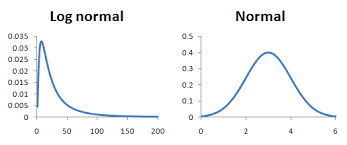



In [36]:
from scipy.stats import lognorm

# Simulate EC50 values (log-normal distribution)
ec50 = lognorm.rvs(s=0.5, scale=10, size=20)  # s=shape, scale=e^μ
print(ec50)  # Prints the generated EC50 values

[13.66031124 10.23636505 10.15695592 12.7996395  30.48450027 10.07224816
  6.6717337   9.42286604  8.77890219  9.58622486  7.79812472 11.0968695
  9.33158993  9.79497914  9.12578941 15.04588133 10.65694908 15.56435402
  7.78567443 17.11534187]


 **Quantum Chemistry (Electron Positions)**

 gamma can be used to simulate or model distances between electron and nucleus
 
  (approximation).

the gamma distribution looks like this:

![jhghj](https://i.sstatic.net/1qYk5.png)



In [ ]:
from scipy.stats import gamma

k=gamma.rvs(a=2,scale=.5,size=10) # note : a is shape parameter and inbuilt, neccessary to define or else error will occur
print(k)  # each k is the possible distance between the eletron and nucleaus

[0.42663103 1.03532984 0.86336046 1.11972308 0.62799541 0.27891543
 1.00742107 2.08817593 1.18940394 1.30352322]


Each k is the possible distance between the eletron and nucleus All are positive, many are 

close to zero, and fewer are large — just like electron distributions.


Explanation:

a (shape): Controls the steepness of the distribution.

scale: Stretches or compresses the distribution. *note:*  scale = 1/rate

size: Number of simulated distances (samples).


**now we can learn how to customize your own distribution**(for future after mastering oops)
